In [145]:
import numpy as np
import datetime
import matplotlib.pyplot as plt
import nltk
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline

### reference
- http://carsonfarmer.com/2013/07/essential-python-geo-libraries/
- https://automating-gis-processes.github.io/2016/Lesson5-interactive-map-bokeh.html
- http://blog.yhat.com/posts/interactive-geospatial-analysis.html
- http://michelleful.github.io/code-blog/2015/04/27/osm-data/
- http://jose-coto.com/plotting-geopandas
- http://geoffboeing.com/2014/09/visualizing-summer-travels-part-6-projecting-spatial-data-python/

In [136]:
TRAFFICLOCATIONS = 'data/Police_-_Traffic_Enforcement_Activity.csv'
CITYLIMITS = 'data/CityLimits/CityLimits.shx'

# OSM extract came from:
# https://mapzen.com/data/metro-extracts/
# https://mapzen.com/data/metro-extracts/your-extracts/7812a99bf7a7
ROADS = 'data/OSMExtract/sville.imposm-geojson/ex_PvZKnDfJgNJVqprsQ1VnhYe9qdVhX_roads.geojson'

In [112]:
# Useful for finding erroneous data points
# Coordinates: ESRI:102686
# AKA NAD 1983 StatePlane Massachusetts Mainland FIPS 2001 Feet
# See https://epsg.io/102686
citylimits = gpd.read_file(CITYLIMITS)
#citylimits.crs = {'init': '+proj=lcc +lat_1=41.71666666666667 +lat_2=42.68333333333333 +lat_0=41 +lon_0=-71.5 +x_0=200000 +y_0=750000.0000000001 +datum=NAD83 +units=us-ft +no_defs'}
print(citylimits.crs)
# this DOESN'T mutate the data frame...
citylimits = citylimits.to_crs(epsg=4326)
print(citylimits.crs)

{'datum': 'NAD83', 'units': 'us-ft', 'lat_1': 41.71666666666667, 'proj': 'lcc', 'lon_0': -71.5, 'lat_2': 42.68333333333333, 'lat_0': 41, 'y_0': 750000, 'x_0': 199999.9999999999, 'no_defs': True}
{'init': 'epsg:4326', 'no_defs': True}


In [143]:
roads = gpd.read_file(ROADS)

In [158]:
df = pd.read_csv(TRAFFICLOCATIONS)
df['dtreceived'] = pd.to_datetime(df['dtreceived'])
df = df.set_index('dtreceived')
df.head()

,incnum,inctype,inctypecode,stnum,stname1,stname2,ra,X,Y
dtreceived,,,,,,,,,
2015-06-25 21:52:41,15029857,MV STOP,1,XX,A ALFRED LOMBARDI ST,NaN,7,-71.078349,42.386641
2014-12-11 00:00:05,14043658,MV STOP,1,XX,A ALFRED LOMBARDI ST,NaN,11,-71.078349,42.386641
2015-03-16 16:45:00,15011746,MV STOP,1,XX,A ALFRED LOMBARDI ST,NaN,11,-71.078349,42.386641
2014-01-11 14:57:27,14001213,MV STOP,1,XX,A ALFRED LOMBARDI ST,NaN,7,-71.078349,42.386641
2013-12-06 09:01:05,13044981,PARKVIOL,660,XX,A ALFRED LOMBARDI ST,NaN,11,-71.078349,42.386641


In [22]:
df['inctype'].value_counts()

MV STOP      30816
PARKVIOL     14577
TRESPTOW      7835
SNOEMTOW      2022
TRAFCOMP      1516
BIKE STOP      399
BOOTLIST       314
SNOWBIRD       111
BIKEVIOL        22
CITATION         7
Name: inctype, dtype: int64

In [174]:
isParking = df['inctype'] == 'PARKVIOL'

In [166]:
df['geometry'] = df.apply(lambda row: Point((float(row.X), float(row.Y))), axis=1)

In [167]:
gdf = gpd.GeoDataFrame(df, geometry='geometry')

In [42]:
gdf.head()

,incnum,inctype,inctypecode,dtreceived,stnum,stname1,stname2,ra,X,Y,geometry
0,15029857,MV STOP,1,06/25/2015 09:52:41 PM,XX,A ALFRED LOMBARDI ST,NaN,7,-71.078349,42.386641,POINT (-71.07834890000001 42.3866409)
1,14043658,MV STOP,1,12/11/2014 12:00:05 AM,XX,A ALFRED LOMBARDI ST,NaN,11,-71.078349,42.386641,POINT (-71.07834890000001 42.3866409)
2,15011746,MV STOP,1,03/16/2015 04:45:00 PM,XX,A ALFRED LOMBARDI ST,NaN,11,-71.078349,42.386641,POINT (-71.07834890000001 42.3866409)
3,14001213,MV STOP,1,01/11/2014 02:57:27 PM,XX,A ALFRED LOMBARDI ST,NaN,7,-71.078349,42.386641,POINT (-71.07834890000001 42.3866409)
4,13044981,PARKVIOL,660,12/06/2013 09:01:05 AM,XX,A ALFRED LOMBARDI ST,NaN,11,-71.078349,42.386641,POINT (-71.07834890000001 42.3866409)


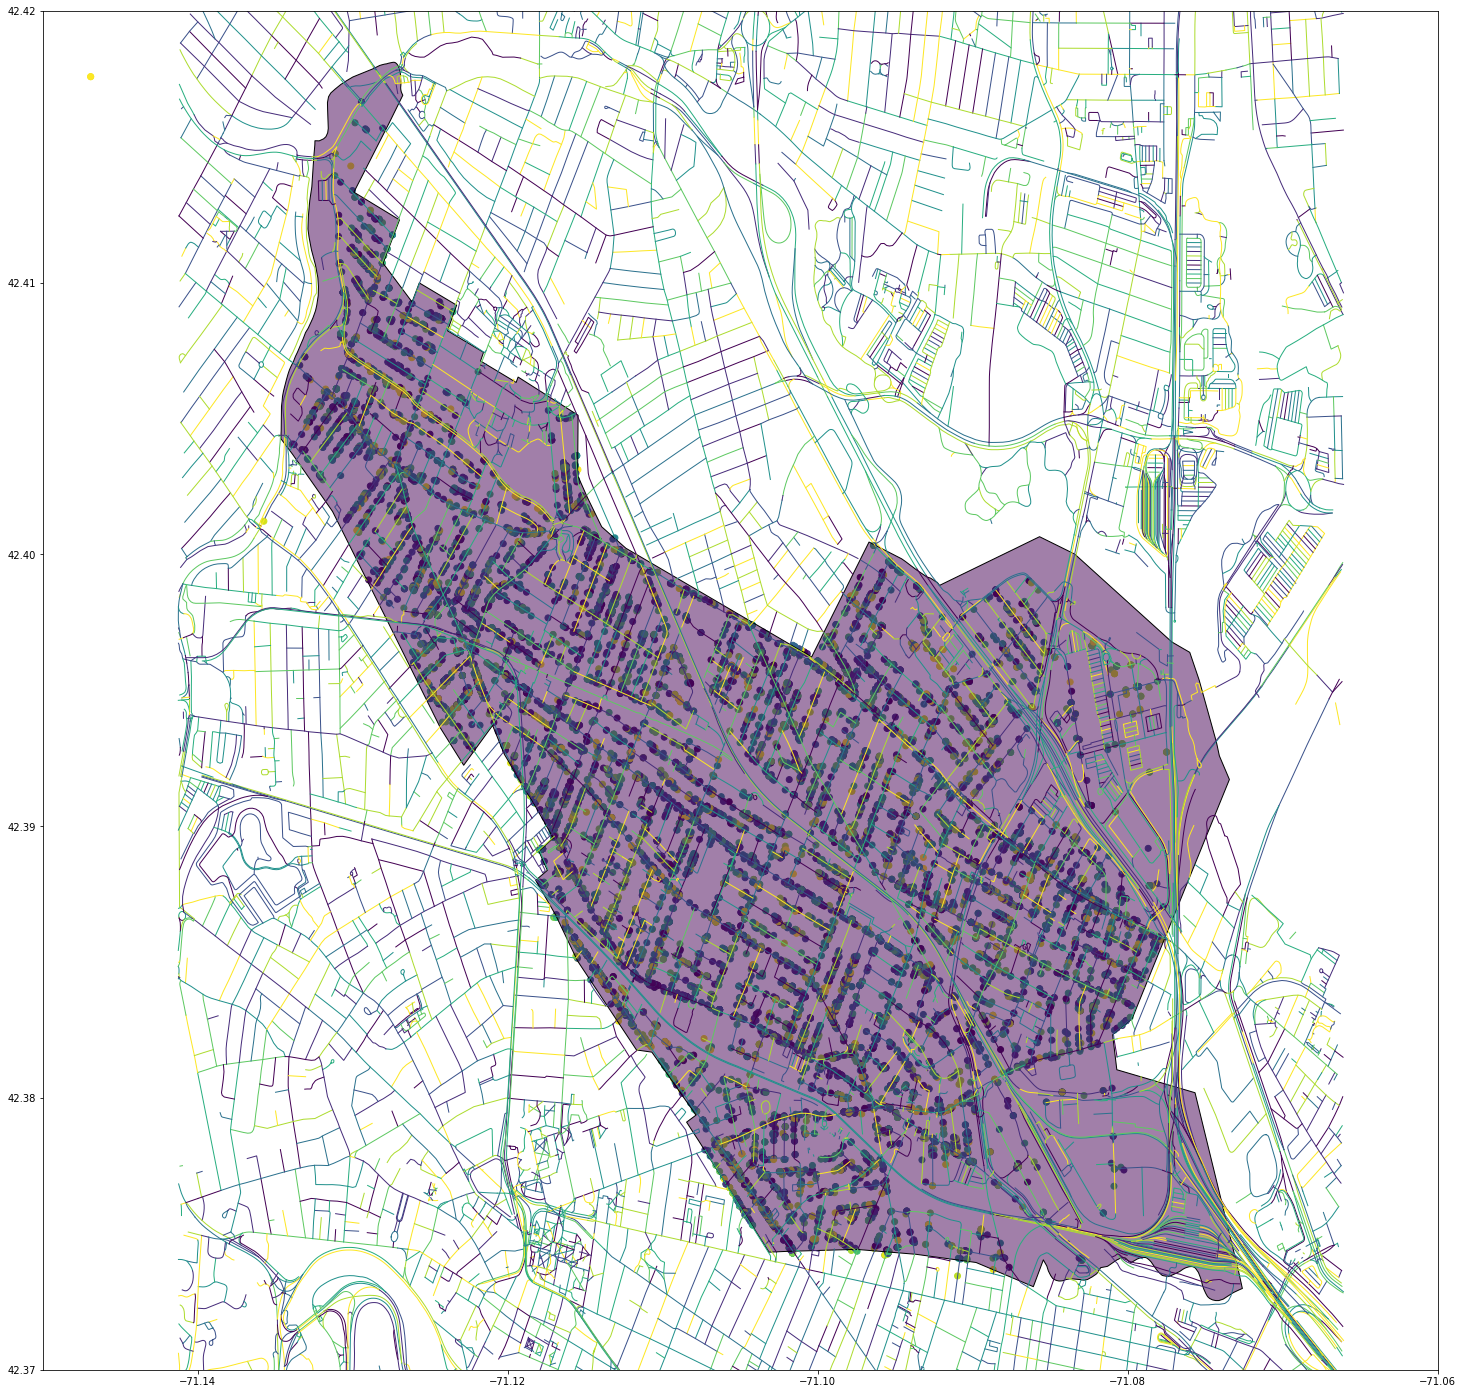

In [181]:
# Axes limits should be automatically set from the shape
# Also, is the projection wrong?
fig, axw = plt.subplots()
citylimits.plot(ax=axw)
axw.set_xlim(-71.15, -71.06)
axw.set_ylim(42.37, 42.42)
axw.scatter(x=df[isParking]['X'], y=df[isParking]['Y'],c=df[isParking].index)
#fig.colorbar(df[isParking].index)
roads.plot(ax=axw)
plt.gcf().set_size_inches(25,25)

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

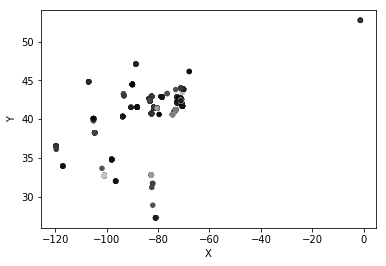

In [164]:
df.plot(x='X',y='Y',kind='scatter', c=df.index)
plt.colorbar()